## **INTRODUCTION**

**Hello! I'm Dinda Tirta Rahayu.**

Here I would like to show you how to prepare the dataset before we visualize the insights.

So, we got the dataset Pokemon. Here is the explanation for each features and label that we would use.

This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

The feature of this data is:




* #:ID for each pokemon
* Name : Name of each pokemon
* Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
* Type 2: Some pokemon are dual type and have 2
* Total: sum of all stats that come after this, a general guide to how strong a pokemon is
* HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
* Attack: the base modifier for normal attacks (eg. Scratch, Punch)
* Defense: the base damage resistance against normal attacks
SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
* SP Def: the base damage resistance against special attacks
* Speed: determines which pokemon attacks first each round

# **OUR OBJECTIVES**

Our objetctives are we know how to prepare and clean the dataset for finding the best combination of Type 1 dan Type 2 of Pokemon with each best fitur. 

We would like to do Data Prepartion that included several steps, like using libraries (Pandas and Numpy) to checking features and label, threating the missing values, threating validation of dataset and visualizing data.

*Let's Start!*

## Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Loading

In [2]:
data = pd.read_csv('/content/Pokemon.csv')

In [3]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Dari .info()
sebenarnya kita sudah bisa tahu ada beberapa missing values yang dimiliki oleh Type 2

In [5]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Insights From .describe()


1.   Pada kolom (#) merupakan ID dari user Pokemon, tabel ini tidak memberikan insigth apapun.
2.   Kolom Total memberikan informasi distribusi dari per karakter.
3.   Jika kita perhatikan median dan mean dari setiap kolom data angkanya berdekatan, untuk itu dapat di duga bahwa data Pokemon memiliki persebaran **distribusi normal**.
4.   Kolom data Generalis tidak saya masukkan karena merupakan data categorical.



In [6]:
data_corr = data.drop(columns=['#', 'Name', 'Type 1', 'Type 2', 'Legendary'], axis=0 )
data_corr = data_corr.corr()
data_corr

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


Insigths from .corr()

Korelasi antar kolom data tidak ada yang melebih 0,9. Oleh karena itu bisa dikatakan setiap kolom memiliki korelasi yang tidak mendekati angka signifikan. Sehingga semua kolom dapat digunakan untuk menjadi features dan label ketika ingin membuat suatu machine learning model.

# Query

In [7]:
#Query
data.value_counts()

#    Name                   Type 1   Type 2  Total  HP   Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
721  Volcanion              Fire     Water   600    80   110     120      130      90       70     6           True         1
269  Dustox                 Bug      Poison  385    60   50      70       50       90       65     3           False        1
250  Ho-oh                  Fire     Flying  680    106  130     90       110      154      90     2           True         1
251  Celebi                 Psychic  Grass   600    100  100     100      100      100      100    2           False        1
254  SceptileMega Sceptile  Grass    Dragon  630    70   110     75       145      85       145    3           False        1
                                                                                                                           ..
485  Heatran                Fire     Steel   600    91   90      106      130      106      77     4           True        

In [8]:
#Checking missing values
data.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [9]:
missing_values = ["n/a", "na", "--"]
data = pd.read_csv("/content/Pokemon.csv", na_values = missing_values)
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [10]:
#Treating missing values
data['Type 2'].fillna('unknown', inplace=True, axis=0)

In [11]:
data.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [12]:
data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,unknown,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,unknown,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,unknown,314,44,48,65,50,64,43,1,False


Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

## Query, Manipulasi, dan Visualisasi Data

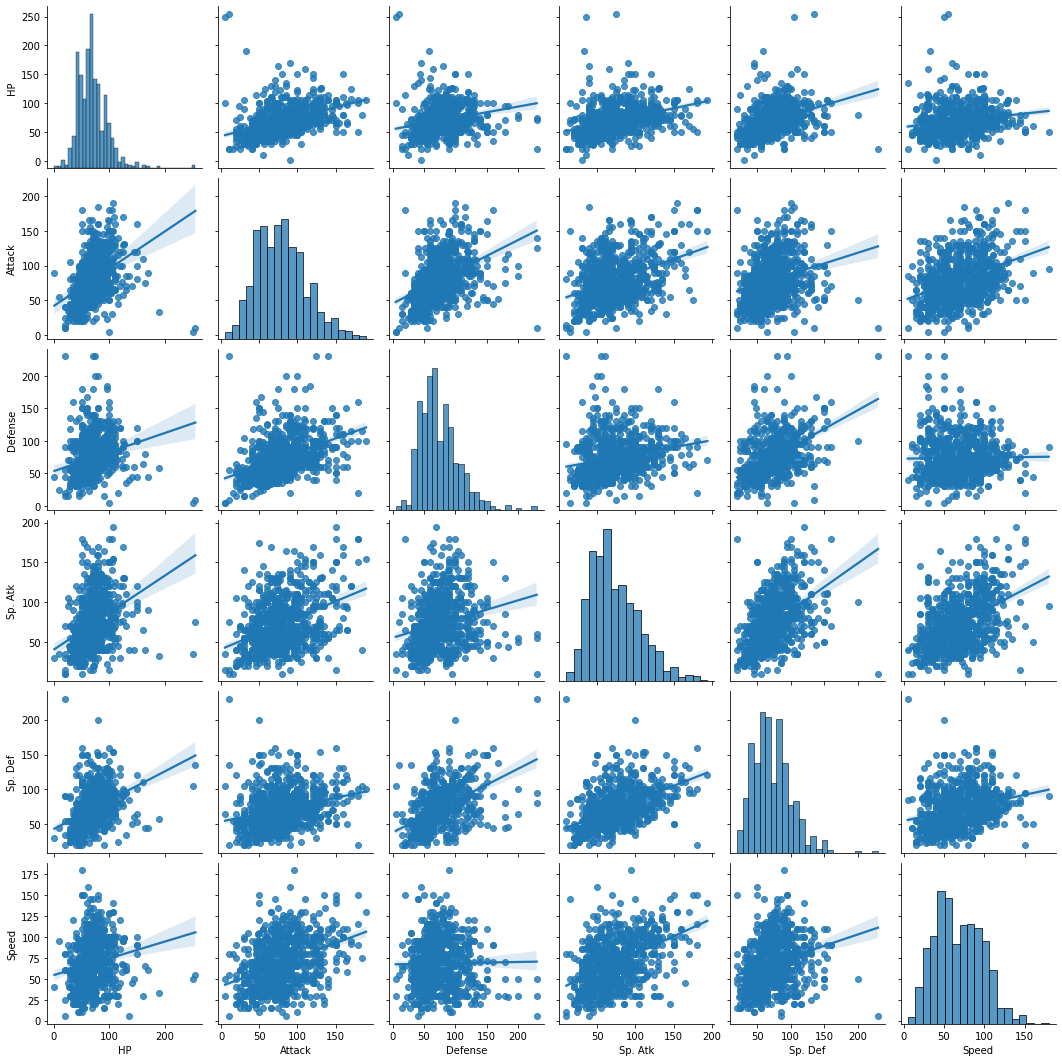

In [13]:
import seaborn as sns
sns.pairplot(data=data.iloc[:,5:-2], kind='reg')

Kita dapat melihat bahwa sebagian besar data miring ke kanan karena semua histogram memiliki sebagian besar nilai di sebelah kiri.
Dan juga terlihat beberapa outliers yang merupakan data terjauh dari disbribusi persebaran data (jauh dari mean dan median).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

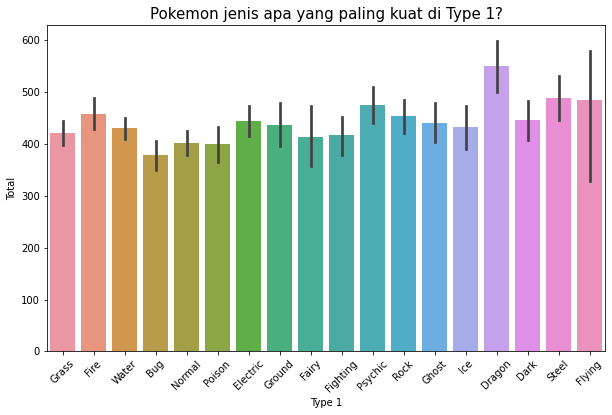

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data['Type 1'], data['Total'], ax=ax, data=data)
plt.title('Pokemon jenis apa yang paling kuat di Type 1?', fontsize=15)
plt.xticks(rotation=45)

Berdasarkan Total pada Type 1 dari Pokemon, nilai total tertinggi ada pada jenis Dragon. Maka jenis Dragon adalah jenis yang paling Pokemon yang paling kuat di Type 1.

In [15]:
data_type_1 = data[data['Type 1'] == "Dragon"]
data_type_1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
159,147,Dratini,Dragon,unknown,300,41,64,45,50,50,50,1,False
160,148,Dragonair,Dragon,unknown,420,61,84,65,70,70,70,1,False
161,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
365,334,Altaria,Dragon,Flying,490,75,70,90,70,105,80,3,False
366,334,AltariaMega Altaria,Dragon,Fairy,590,75,110,110,110,105,80,3,False
406,371,Bagon,Dragon,unknown,300,45,75,60,40,30,50,3,False
407,372,Shelgon,Dragon,unknown,420,65,95,100,60,50,50,3,False
408,373,Salamence,Dragon,Flying,600,95,135,80,110,80,100,3,False
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
417,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

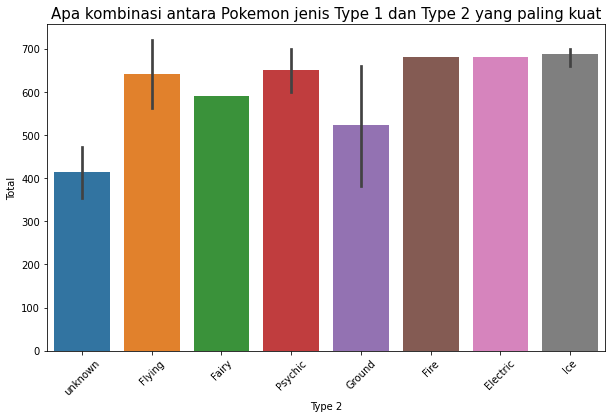

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data_type_1['Type 2'], data_type_1['Total'], ax=ax, data=data_type_1)
plt.title('Apa kombinasi antara Pokemon jenis Type 1 dan Type 2 yang paling kuat', fontsize=15)
plt.xticks(rotation=45)

Barplot di atas menunjukkan kombinasi antara Pokemon Type 1 dan Type 2 yang paling kuat ada di Type 1 yaiut Dragon dan Type 2 yaitu Fire, Electric dan ice



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


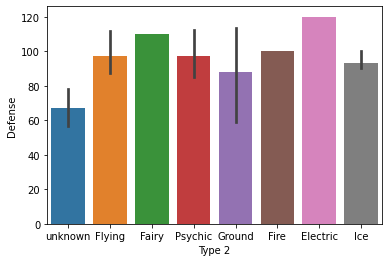

In [17]:

sns.barplot( data_type_1['Type 2'], data_type_1['Defense'])

Barplot diatas menunjukkan resistensi kerusakan dasar terhadap serangan normal ada pada kombinasi Type 1 Dragon dan Type 2 Electric.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


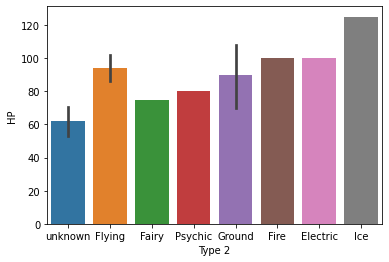

In [18]:
sns.barplot( data_type_1['Type 2'], data_type_1['HP'])

Barplot diatas menunjukkan poin hit, atau kesehatan, menentukan seberapa besar kerusakan yang dapat ditahan oleh pokemon sebelum pingsan tertinggi ada pada kombinasi Type 1 Dragon dan Type 2 Ice.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


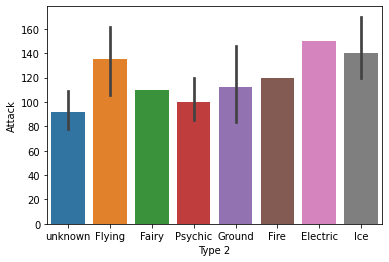

In [19]:
sns.barplot( data_type_1['Type 2'], data_type_1['Attack'])

Barplot diatas menunjukkan poin hit, atau kesehatan, menentukan pengubah dasar untuk serangan normal tertinggi ada pada kombinasi Type 1 Dragon dan Type 2 Electric.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


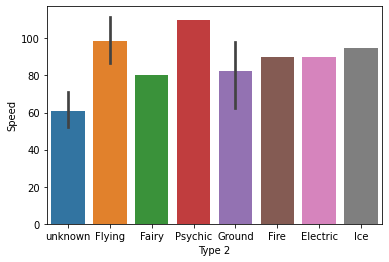

In [20]:
sns.barplot( data_type_1['Type 2'], data_type_1['Speed'])

Barplot diatas menunjukkan pokemon mana yang menyerang lebih dulu setiap putaran tertinggi ada pada kombinasi Type 1 Dragon dan Type 2 Psychic.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


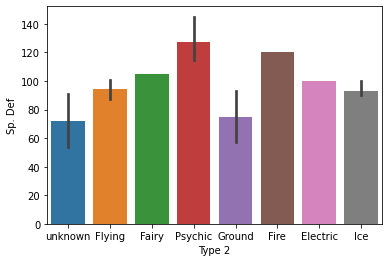

In [21]:
sns.barplot( data_type_1['Type 2'], data_type_1['Sp. Def'])

Barplot diatas menunjukkan pokemon yang memiliki resistensi kerusakan terhadap serangan khusus tertinggi ada pada kombinasi Type 1 Dragon dan Type 2 Psychic

# Kesimpulan

Kombinasi terbaik pada Type 1 dan Type 2 dari Pokemon yaitu Dragon dan Ice, Dragon dan Fire, Dragon dan Electric. Dimana kombinasi Dragon dan Ice unggul pada kukuatan HP dan Attack nya sedangkan Dragon dan Elcetric unggul pada kekuatan Defense nya.